<a href="https://colab.research.google.com/github/C22342081/Applied-Predictive-Analytics-Lab/blob/main/Lab_3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
# Natural Language
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
stopwords.append('http')
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## 1. **Dataset**

In [77]:
#load dataset
data = pd.read_csv('https://raw.githubusercontent.com/waelrash1/predictive_analytics_DT302/main/training.30000.processed.noemoticon.csv',
                    encoding='latin-1',
                    header = None,
                    usecols=[0,5],
                    names=['target','text'])
#random sample
data = data.sample(n=5000,random_state=100).reset_index(drop=True)
data['text']= data['text'].astype(str)

/tmp/ipython-input-4029243784.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/waelrash1/predictive_analytics_DT302/main/training.30000.processed.noemoticon.csv',


In [78]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
def clean_text(text):
    """
    Return clean text
    params
    ------------
        text: string
    """

    text = text.lower() #lowercase
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if not t in stopwords] #remove stopwords
    tokens = [t for t in tokens if t.isalnum()] #remove punctuation
    text_clean = " ".join(tokens)

    return text_clean

#clean text
data['textCleaned'] = [clean_text(text) for text in data['text']]

In [80]:
# Just in case some rows had issues (e.g. empty tweets), this removes rows with NaN values.
data.dropna().count()
data= data.dropna()

## **Feature Engineering**

In [81]:
len(data)
data.sample(10)

,target,text,textCleaned
68,0.0,Omggg Headache's baaack. Ffs.,omggg headache baaack ffs
1045,0.0,Raining,raining
1894,0.0,My dog destroyed my house,dog destroyed house
4233,0.0,Nothing stinks more than getting sick on vacat...,nothing stinks getting sick vacation
1291,4.0,Night everybody!!,night everybody
1513,0.0,Officially bored of this now Ive been at it f...,officially bored ive like hours straight got a...
510,0.0,mums moaning at us to go to bed,mums moaning us go bed
1750,0.0,Man I am really trying to get into Harper's Is...,man really trying get harper island ca nhl sta...
2853,4.0,"okay, off to sleep! so excited i found filters...",okay sleep excited found filters coffee maker ...
4572,0.0,OMG Rob pattinson got hit by a cab ??,omg rob pattinson got hit cab


In [82]:
#train test split
from sklearn.model_selection import train_test_split

X=data['textCleaned']
y=data['target']
X_train_t,X_test_t, y_train,  y_test=train_test_split(X,y,test_size=0.2)
#train = data[0:40000]
#test = data[40000:50000].reset_index(drop=True)

# Create count vectoriser
vectorizer = CountVectorizer(ngram_range=(1, 2)
                            ,max_features=1000)

# Transform training corpus into feature matrix
X = vectorizer.fit_transform(X_train_t)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
X_train = pd.DataFrame(data=X.toarray(), columns=feature_names)
#y_train = train['target']

In [83]:
len(X_train)
len(y_train)

1719

In [84]:
X_train.sample(5)

,10,100,14th,15,20,2day,2nd,able,acting,actually,...,yearbook,years,years ago,yellow,yes,yesterday,yet,yo,youtube,yummy
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:

# Transform testing corpus into feature matrix
X = vectorizer.transform(X_test_t.astype(str))

X_test = pd.DataFrame(data=X.toarray(),columns=feature_names)
#y_test = test['target']


In [86]:
# Min-Max scalling
x_max = X_train.max()
x_min = X_train.min()

X_train = (X_train - x_min)/x_max
X_test = (X_test - x_min)/x_max

In [87]:
X_train.sample(5)

,10,100,14th,15,20,2day,2nd,able,acting,actually,...,yearbook,years,years ago,yellow,yes,yesterday,yet,yo,youtube,yummy
757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Modelling**

In [88]:
#fit SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', C=.75).fit(X_train, y_train)

#get predictions on test set
y_pred_tr = model.predict(X_train)
y_pred = model.predict(X_test)
accuracy_tr = accuracy_score(y_train,y_pred_tr)
#accuracy on test set
accuracy = accuracy_score(y_test,y_pred)
print("Train Accuracy: {}".format(accuracy_tr))
print("Test Accuracy: {}".format(accuracy))

Train Accuracy: 0.9133216986620128
Test Accuracy: 0.8023255813953488


In [89]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

Text(0.5, 68.24999999999999, 'Predicted')

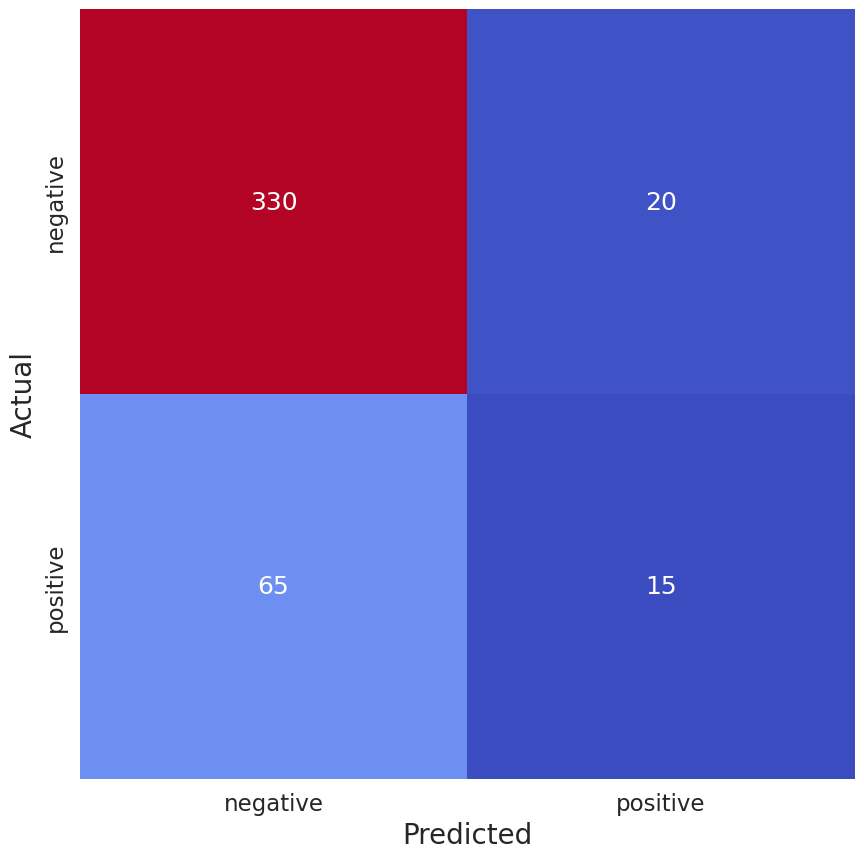

In [90]:
#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=20)
plt.xlabel('Predicted',size=20)

In [91]:
y_train.value_counts()

,count
target,
0.0,1412
4.0,307


In [92]:
# fit a svm on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC


In [93]:
model = SVC(gamma='scale')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.821


In [94]:
# class count
class_count_0, class_count_1 =   y_train.value_counts()

# Separate class
negative_sent = y_train[y_train == 0.0]
positive_sent = y_train[y_train != 0.0]# print the shape of the class
print('Negative class 0:', negative_sent.shape)
print('Positive class 1:', positive_sent.shape)

Negative class 0: (1412,)
Positive class 1: (307,)


## **TF-IDF Vectorizer**

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
X=data['textCleaned']
y=data['target']
X_train_t,X_test_t, y_train,  y_test=train_test_split(X,y,test_size=0.2)
# instantiate the vectorizer object
#countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
#count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(X_train_t)

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_tokens = tfidfvectorizer.get_feature_names_out()


X_train = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

print("\nTD-IDF Vectorizer\n")
print(X_train)


TD-IDF Vectorizer

       10  100  1000  100plus  101  10am   11  110  1130   12  ...  yummy  \
0     0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
1     0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
2     0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
3     0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
4     0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
...   ...  ...   ...      ...  ...   ...  ...  ...   ...  ...  ...    ...   
1714  0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
1715  0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
1716  0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
1717  0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   
1718  0.0  0.0   0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   

      yung  zac  zachary  zealand  zindagi  zoe  zooey 

In [98]:
# Transform testing corpus into feature matrix
X = tfidfvectorizer.transform(X_test_t.astype(str))

X_test = pd.DataFrame(data=X.toarray(),columns=tfidf_tokens)
#y_test = test['target']

In [99]:
# Modelling
#fit SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1).fit(X_train, y_train)

#get predictions on test set
y_pred = model.predict(X_test)

#accuracy on test set
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8465116279069768


In [100]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])


Text(0.5, 68.24999999999999, 'Predicted')

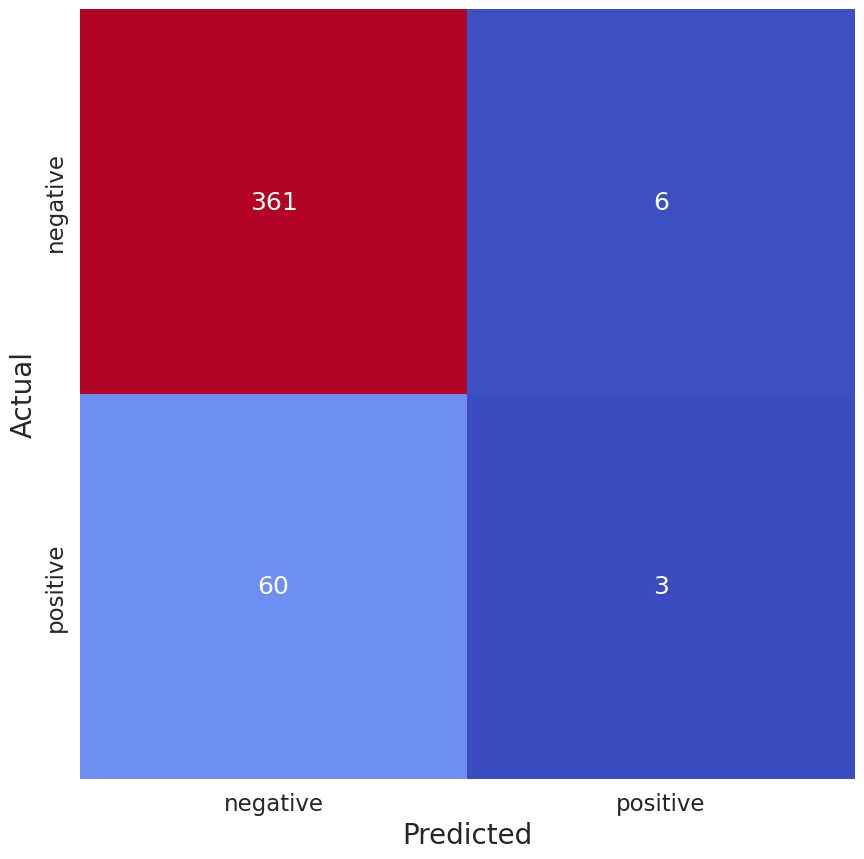

In [101]:
#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=20)
plt.xlabel('Predicted',size=20)

In [102]:
# fit a svm on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

model = SVC(gamma='scale')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.3f' % mean(scores))

Mean Accuracy: 0.811
